# Explore results from 500m MIKE SHE Skjern model

### **Output Files**

Outputs from a MIKE SHE simulation are in a variety of formats. The following descriptions are from [MIKE Web Help > Output Files](https://doc.mikepoweredbydhi.help/webhelp/2025/mikeshe/MIKE_SHE_online/Working_with_Results/Output_Files.htm).

- **.sheres** — ASCII file that is a catalogue of all the output files associ­ated with a simulation.
- **.hot.sheres** — reduced version of the .sheres file for hot starting only.
- **.frf** — binary output file containing all of the static information on the simulation, as well as all of the time series results that cannot be easily stored in a dfs format.
- **.dfs0, .dfs2, .dfs3** — binary time series format. Each file can contain multi­ple output items, but each of the items must be stored at the same time step interval. 

Here we will focus on dfs outputs and show how to visualize a few here. More detail on each of the outputs are described here [MIKE Web Help](https://doc.mikepoweredbydhi.help/webhelp/2025/mikeshe/MIKE_SHE_online/MSHE_Getting_started/Getting_Started.htm), under sections [Output Files](https://doc.mikepoweredbydhi.help/webhelp/2025/mikeshe/MIKE_SHE_online/Working_with_Results/Output_Files.htm) and [Output Items](https://doc.mikepoweredbydhi.help/webhelp/2025/mikeshe/MIKE_SHE_online/Working_with_Results/Output_Items.htm)

The filenames and the variables they contain are listed in the [MIKE SHE Web Help Appendix A](https://doc.mikepoweredbydhi.help/webhelp/2025/mikeshe/index.htm#MIKE_SHE_online/AppendixA/Appendix.htm#XREF_90729_A_1_MIKE_SHE)

Output files are not included in this respository - These will need to be downloaded from Zenodo as described in the [WaterBench-MIKESHE-Skjern Github README](https://github.com/DHI/WaterBench-MIKESHE-Skjern/tree/main).



### **Water Balance Tool Output**

The MIKE Zero [Water Balance Tool](https://doc.mikepoweredbydhi.help/webhelp/2025/mikeshe/MIKE_SHE_online/Water_Balance/Using_the_Water_Balance_Tool.htm) post-processes the results from the MIKE SHE simulations and creates water balance summaries for the individual components (fx. Overland Flow (OF), Saturated Zone (SZ), Unsaturated Zone (UZ), Irrigation, etc.)

The Water Balance Tool is part of the MIKE Zero toolbox. Here we will plot some of the outputs created in the tool's GUI. More details on how to use the Water Balance Tool are shown at [MIKE SHE Web Help][https://doc.mikepoweredbydhi.help/webhelp/2025/mikeshe/MIKE_SHE_online/Water_Balance/Creating_a_water_balance.htm]

*Note: The values in the water balance are in the EUM unit type (here, mm) Storage Depth. These storage depths can be converted to volumes by multiplying by the internal model area, found in the _WM_PRINT.LOG file.*


In [ ]:
import mikeio
import geopandas as gpd
import matplotlib.pyplot as plt
import geopandas as gpd
import tools


In [3]:
# reslts folder
res_folder = r"..\Skjern_Models\Setup\HIP_500m_mh_Skjern_DHI.mhydro - Result Files"

In [4]:
# ---------------------- Read a sample file to see the structure and variable names ----------------------
dfs2 =mikeio.read(r"..\Skjern_Models\Setup\HIP_500m_Skjern_DHI.she - Result Files\HIP_500m_Skjern_DHI_overland.dfs2")
print(dfs2)

dfs3 = mikeio.read(r"..\Skjern_Models\Setup\HIP_500m_Skjern_DHI.she - Result Files\HIP_500m_Skjern_DHI_3DSZflow.dfs3")
print(dfs3[0])

<mikeio.Dataset>
dims: (time:782, y:140, x:180)
time: 1990-01-02 06:00:00 - 2019-12-10 06:00:00 (782 records)
geometry: Grid2D (ny=140, nx=180)
items:
  0:  depth of overland water <Water Depth> (meter)
  1:  overland flow in x-direction <Discharge> (meter pow 3 per sec) - 3
  2:  overland flow in y-direction <Discharge> (meter pow 3 per sec) - 3
  3:  OL drainage Outflow <Discharge> (meter pow 3 per sec) - 3
  4:  OL Drain Stored Volume <Water Volume> (meter pow 3)
  5:  OL Drain Storage Inflow (flow) <Discharge> (meter pow 3 per sec) - 3
<mikeio.DataArray>
name: groundwater flow in x-direction
dims: (time:782, z:8, y:140, x:180)
time: 1990-01-02 06:00:00 - 2019-12-10 06:00:00 (782 records)
geometry: Grid3D(nz=8, ny=140, nx=180)



<Axes: title={'center': 'Head elevation in saturated zone at 2019-04-02'}>

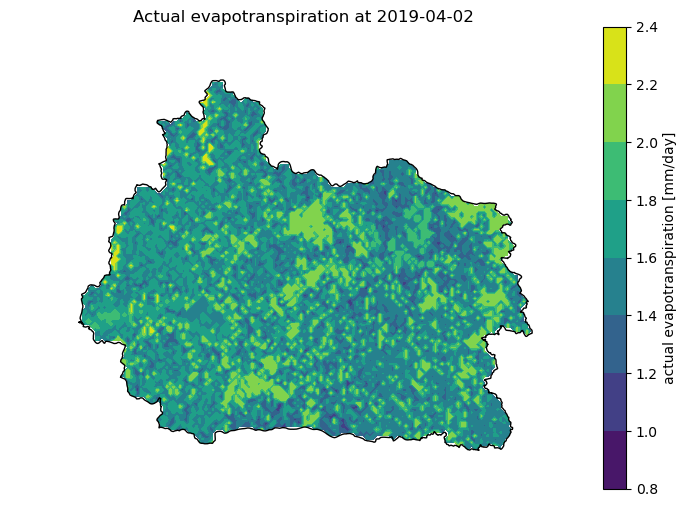

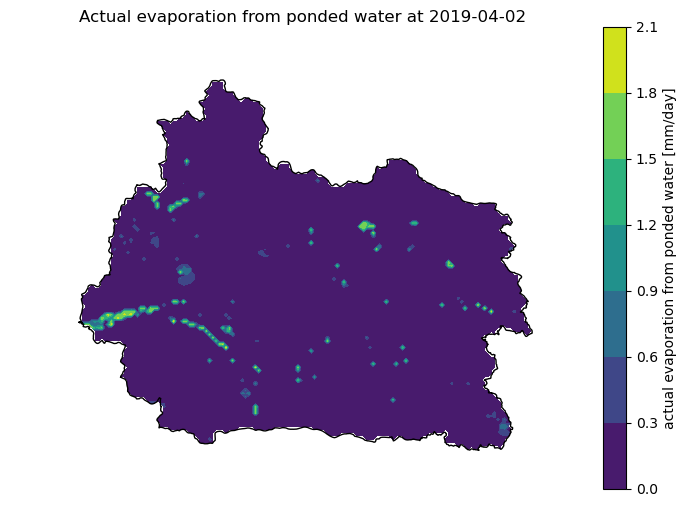

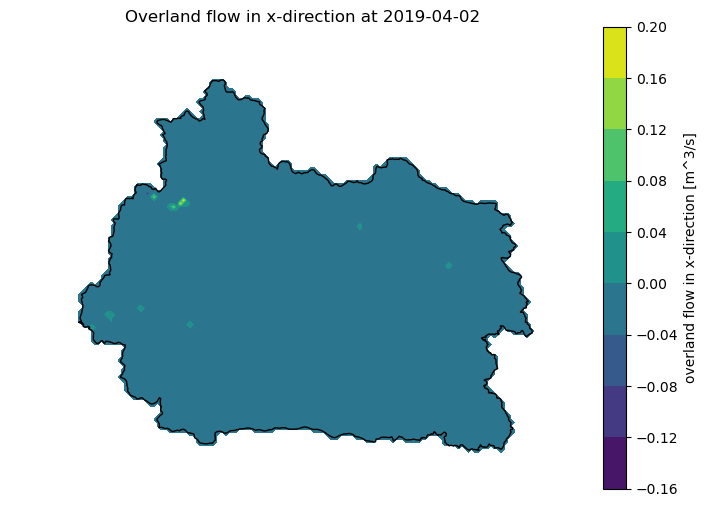

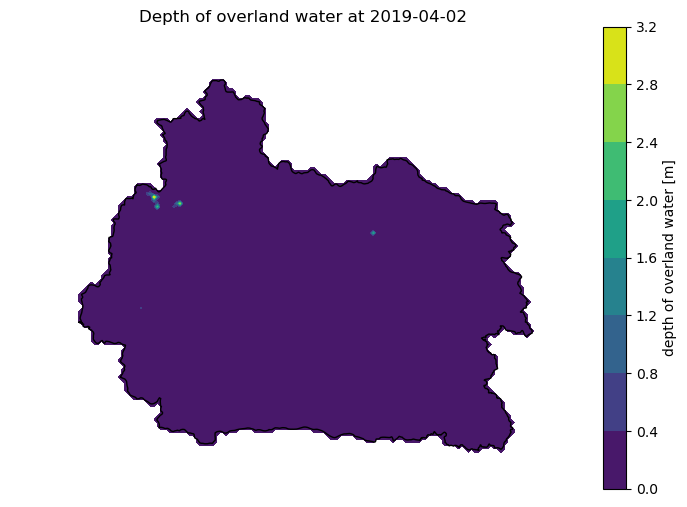

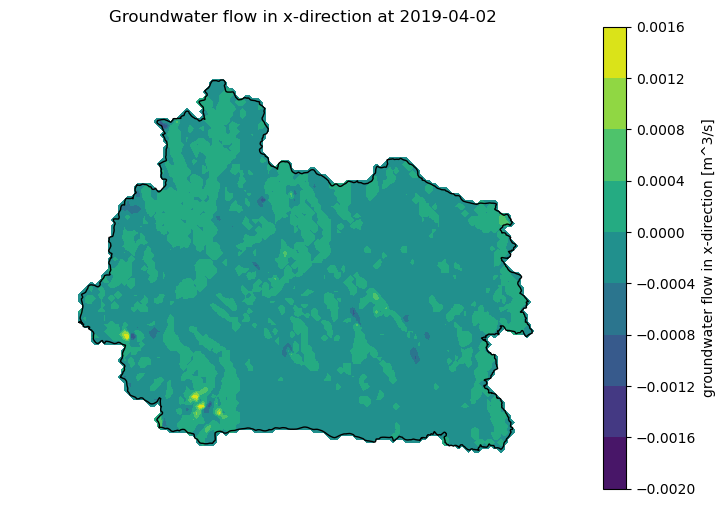

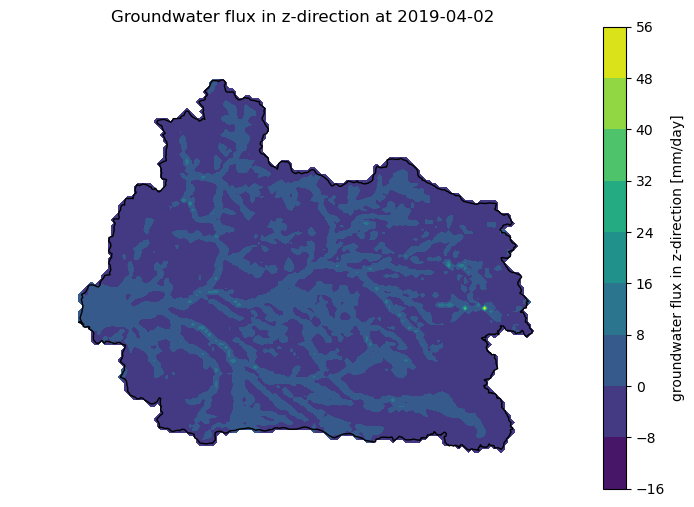

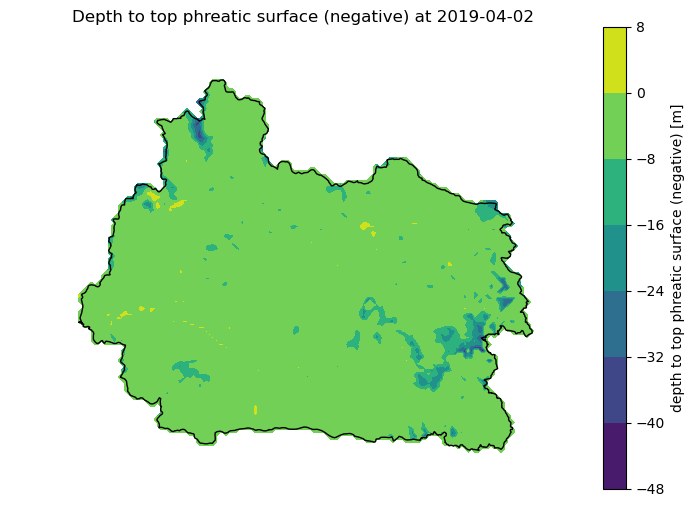

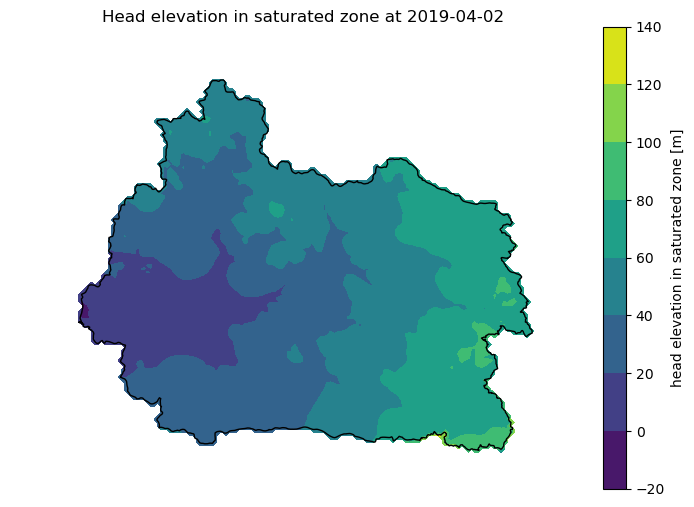

In [ ]:
# ---------------------- View some gridded results ----------------------

domain_shp = gpd.read_file(r"..\MapsDK\DKDomains2013\ID15_oplande_Skjern.shp")

# Actual evapotranspiration
tools.plot_dfs2_output(r"..\Skjern_Models\Setup\HIP_500m_Skjern_DHI.she - Result Files\HIP_500m_Skjern_DHI_ET_UzCells.dfs2", varname='actual evapotranspiration', timeID=763, ax=None, shapefile=domain_shp)

# From ponded water
tools.plot_dfs2_output(r"..\Skjern_Models\Setup\HIP_500m_Skjern_DHI.she - Result Files\HIP_500m_Skjern_DHI_ET_UzCells.dfs2", varname='actual evaporation from ponded water', timeID=763, ax=None, shapefile=domain_shp)

# Overland flow in x direction
tools.plot_dfs2_output(r"..\Skjern_Models\Setup\HIP_500m_Skjern_DHI.she - Result Files\HIP_500m_Skjern_DHI_overland.dfs2", varname='overland flow in x-direction', timeID=763, ax=None, shapefile=domain_shp)

# Overland water depth
tools.plot_dfs2_output(r"..\Skjern_Models\Setup\HIP_500m_Skjern_DHI.she - Result Files\HIP_500m_Skjern_DHI_overland.dfs2", varname='depth of overland water', timeID=763, ax=None, shapefile=domain_shp)

# Groundwater flow in x,y,z direction
tools.plot_dfs2_output(r"..\Skjern_Models\Setup\HIP_500m_Skjern_DHI.she - Result Files\HIP_500m_Skjern_DHI_3DSZflow.dfs3", varname='groundwater flow in x-direction', timeID=763, ax=None, shapefile=domain_shp,layerID=4)

# Groundwater flux in z direction
tools.plot_dfs2_output(r"..\Skjern_Models\Setup\HIP_500m_Skjern_DHI.she - Result Files\HIP_500m_Skjern_DHI_3DSZflow.dfs3", varname='groundwater flux in z-direction', timeID=763, ax=None, shapefile=domain_shp,layerID=4)

# depth to phreatic surface (negative)
tools.plot_dfs2_output(r"..\Skjern_Models\Setup\HIP_500m_Skjern_DHI.she - Result Files\HIP_500m_Skjern_DHI_2DSZ.dfs2", varname='depth to top phreatic surface (negative)', timeID=763, ax=None, shapefile=domain_shp,layerID=4)

# head elevation in saturated zone
tools.plot_dfs2_output(r"..\Skjern_Models\Setup\HIP_500m_Skjern_DHI.she - Result Files\HIP_500m_Skjern_DHI_3DSZ.dfs3", varname='head elevation in saturated zone', timeID=763, ax=None, shapefile=domain_shp,layerID=4)


In [35]:
# Export one timestep of ponded water to geodataframe - for viewing in QGIS

OWevt_dfs2 = mikeio.read(r"..\Skjern_Models\Setup\HIP_500m_Skjern_DHI.she - Result Files\HIP_500m_Skjern_DHI_ET_UzCells.dfs2")
varname='actual evaporation from ponded water'
timeID = 763  # selected time step
OWevt_dfs2 = OWevt_dfs2[varname][timeID]
test = OWevt_dfs2.to_xarray()

df = test.to_dataframe().reset_index()
gdf = gpd.GeoDataFrame(
    df[varname], geometry=gpd.points_from_xy(df.x,df.y))

# rename varname to 'OWTD'
gdf.rename(columns={varname: 'evt'}, inplace=True)

# export geodataframe to shapefile
gdf.crs = "EPSG:32632"  # EPSG for UTM 32N (WGS 84)
#gdf.to_file(r"..\Skjern_Models\Setup\HIP_500m_Skjern_DHI.she - Result Files\evt_ponded_water.shp")


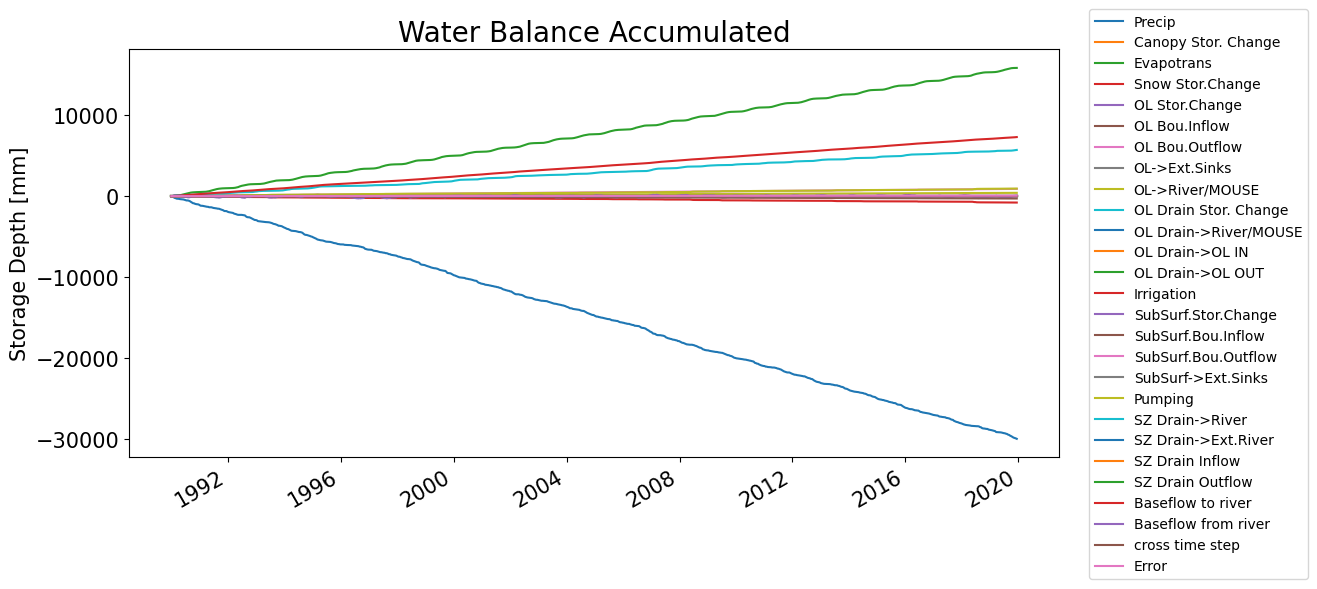

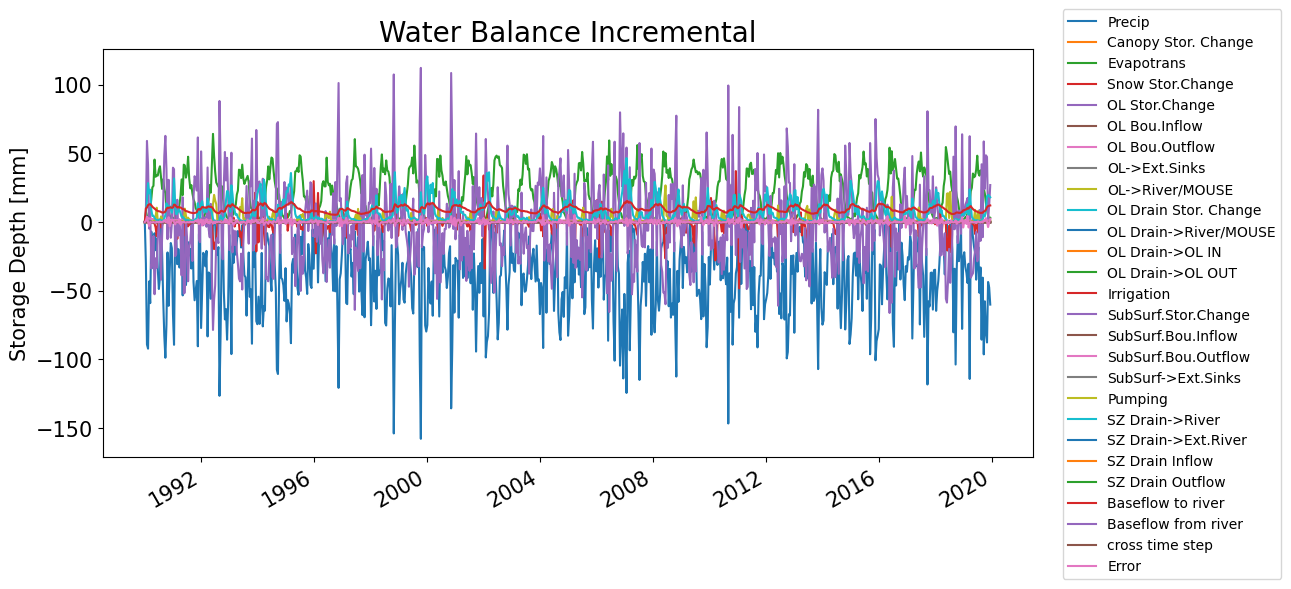

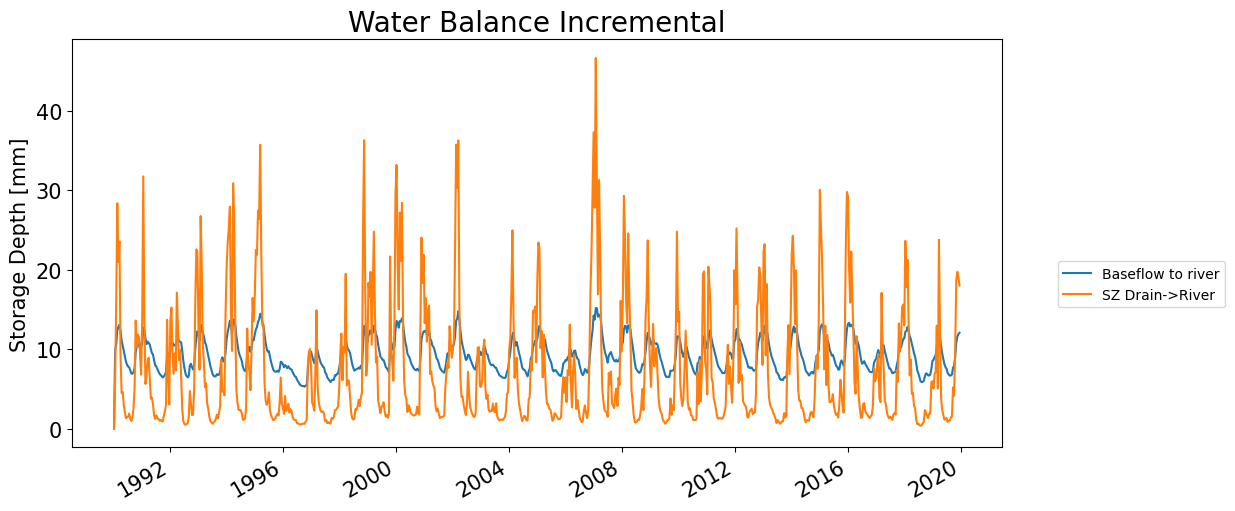

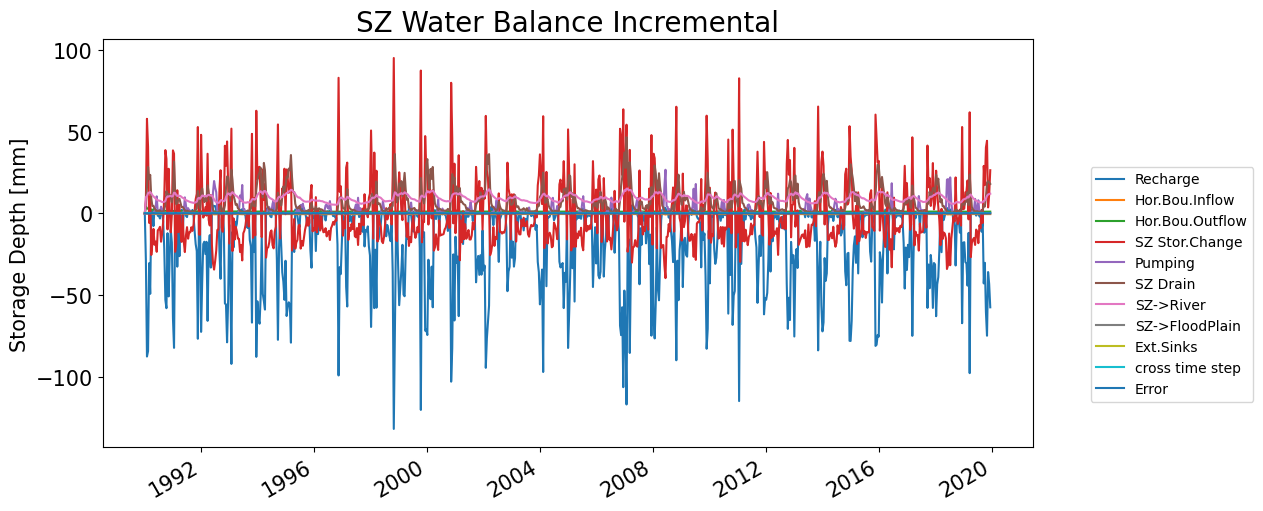

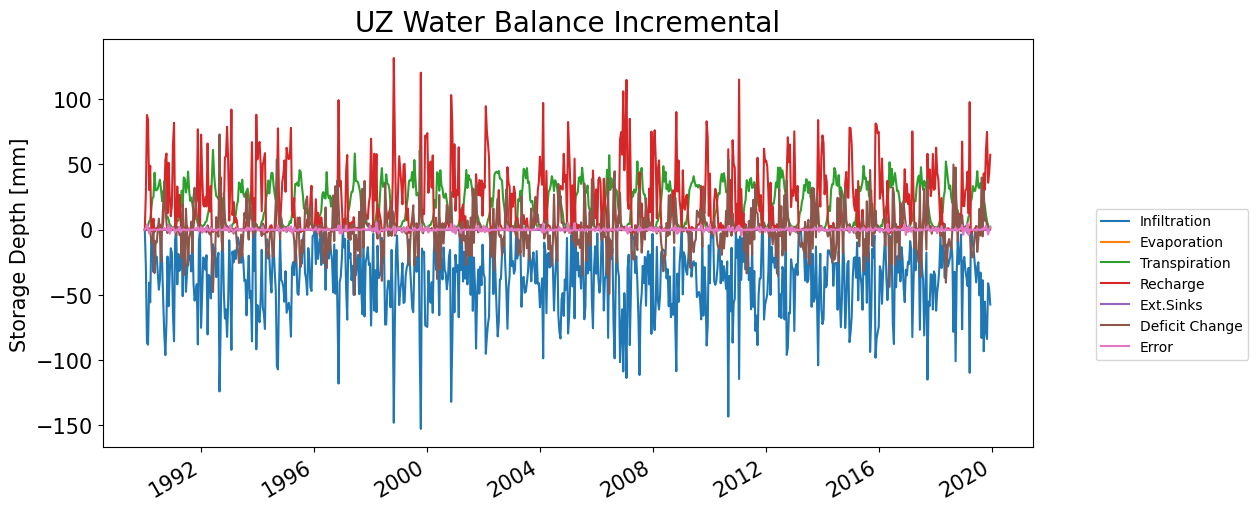

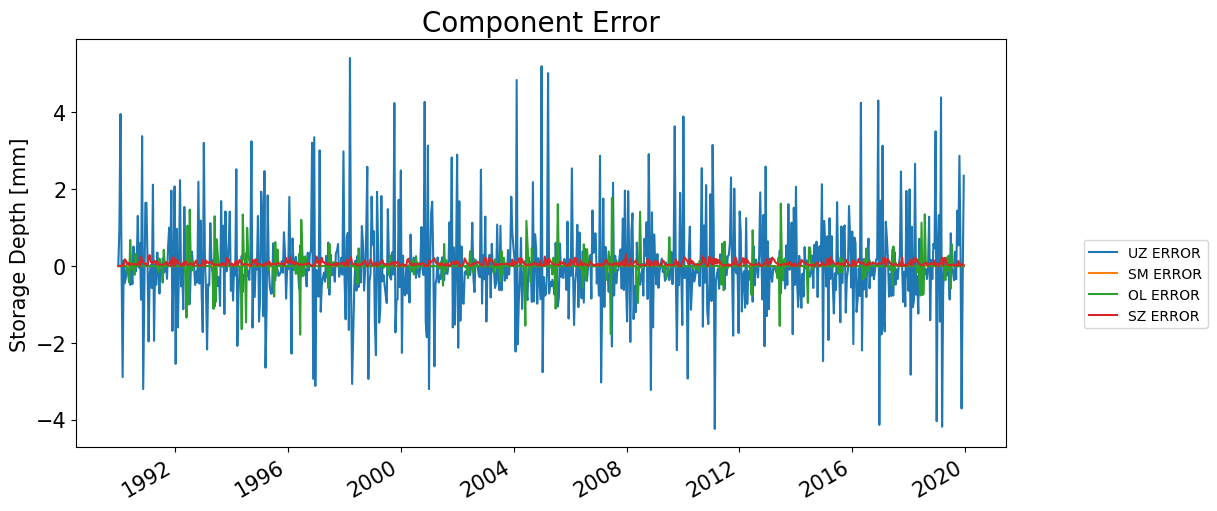

In [ ]:
# ---------------------- Open water balance file (Output from the MIKE Zero Water Balance Tool) ----------------------

# Total accumulated
tools.plot_wb_output(r"..\waterbalance_output\wb_accumulated.dfs0",'Water Balance Accumulated')

# Total incremental
tools.plot_wb_output(r"..\waterbalance_output\wb_incremental.dfs0",'Water Balance Incremental')
# look only at baseflow river and SZ drain to river
varlist = ['Baseflow to river','SZ Drain->River']
tools.plot_wb_output(r"..\waterbalance_output\wb_incremental.dfs0",'Water Balance Incremental',varlist=varlist)

# Saturated zone incremental
tools.plot_wb_output(r"..\waterbalance_output\wb_SZ_incremental.dfs0",'SZ Water Balance Incremental')

# Unsaturated zone incremental
tools.plot_wb_output(r"..\waterbalance_output\wb_UZ_incremental.dfs0",'UZ Water Balance Incremental')

# Water balance errors - positive errors indicate the model is generating water
tools.plot_wb_output(r"..\waterbalance_output\wb_component_error.dfs0",'Component Error',varlist=['UZ ERROR','SM ERROR','OL ERROR','SZ ERROR'])

